a. What is the Average rating of Netflix Movie.
b. Is Avg Rating for Movies Higher than Avg Rating for TV Series.
c. Are TV Series are more loved in comparison to Movies, If yes what
is the Reason behind that.
d. Does Having an ensemble cast have an impact on the popularity of
the show.
e. Does Audiences prefer a longer episode or a shorter episode, what
is the scope of Short series?
f. Apart from the United States, which other States are Huge Viewers
of Netflix.
g. Which Genre is having a bigger fan following
h. Compare the Ratings with respect to the release year of the show.
i. Try to Analyze the Recipe of making a Huge Hit TV Show or Movie
in Netflix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('netflix_titles.csv')

In [108]:
data.shape

(7787, 12)

In [109]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [110]:
data.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4577,s4578,Movie,Offering to the Storm,Fernando González Molina,"Marta Etura, Leonardo Sbaraglia, Carlos Librad...","Spain, Germany","July 24, 2020",2020,TV-MA,140 min,"International Movies, Thrillers",Amaia investigates several suspicious infant d...


In [111]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [113]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [114]:
round(100*(data.isnull().sum()/len(data.index)),2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [115]:
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['cast'] = data['cast'].fillna(data['cast'].mode()[0])
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])
data = data.drop(['director'],axis=1)

In [116]:
round(100*(data.isnull().sum()/len(data.index)),2)

show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

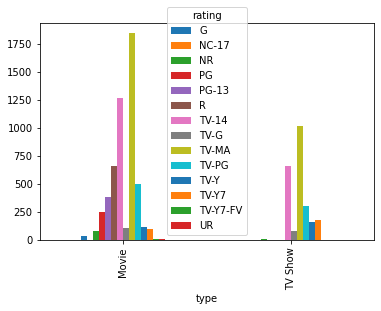

In [144]:
#average rating of netflix movie
#bivariate analysis
#two categorical columns

pd.crosstab(data['type'],data['rating']).plot(kind = 'bar' , stacked = False)
plt.show()


#The average rating of a netflix movie is 'TV-MA'
#The average rating of a netflix movie is higher than avergae rating for a TV-series

In [118]:
# More likelyness of tv series or movies in the audience and the reason

movies = data[(data['type']=='Movie')]
tv = data[(data['type']=='TV Show')]
movies['listed_in'].value_counts()

#documentary genre has the biggest fan following

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
                                                   ... 
Children & Family Movies, Comedies, Cult Movies       1
International Movies, Romantic Movies, Thrillers      1
Classic Movies, Comedies, Sports Movies               1
Children & Family Movies, Comedies, LGBTQ Movies      1
Comedies, Romantic Movies, Sports Movies              1
Name: listed_in, Length: 265, dtype: int64

In [119]:
tv['listed_in'].value_counts()

Kids' TV                                                205
International TV Shows, TV Dramas                       111
Crime TV Shows, International TV Shows, TV Dramas       106
Kids' TV, TV Comedies                                    90
International TV Shows, Romantic TV Shows, TV Dramas     86
                                                       ... 
TV Horror, TV Mysteries, Teen TV Shows                    1
Reality TV, TV Horror, TV Thrillers                       1
Romantic TV Shows, TV Dramas, Teen TV Shows               1
Crime TV Shows, TV Dramas, TV Horror                      1
TV Comedies, TV Mysteries                                 1
Name: listed_in, Length: 227, dtype: int64

In [120]:
movies['cast'].value_counts()

David Attenborough                                                                                                                                                              431
Samuel West                                                                                                                                                                      10
Jeff Dunham                                                                                                                                                                       7
Craig Sechler                                                                                                                                                                     6
Kevin Hart                                                                                                                                                                        6
                                                                                                    

In [121]:
tv['cast'].value_counts()

David Attenborough                                                                                                                                                          305
Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson                                                                                                     4
Bettany Hughes                                                                                                                                                                2
Anitta                                                                                                                                                                        2
Nicholas Day                                                                                                                                                                  2
                                                                                                                        

In [122]:
#Movies are more loved than Tv series.
#The reason being the love of audience towards 'documentaries' which is way more in popularity
#Presence of David Attenborough  has a huge impact on the popularity of the tv shows and the movies
#David Attenborough  present in 431 movies and 305 tv shows

In [123]:
tv['duration'].mode()

0    1 Season
dtype: object

In [124]:
movies['duration'].mode()

0    90 min
dtype: object

In [125]:
tv['duration'].min()

'1 Season'

In [126]:
tv['duration'].max()

'9 Seasons'

In [127]:
movies['duration'].min()

'10 min'

In [128]:
movies['duration'].max()

'99 min'

In [129]:
movies['duration'].value_counts()

90 min     136
93 min     131
91 min     125
94 min     125
95 min     119
          ... 
186 min      1
228 min      1
208 min      1
230 min      1
214 min      1
Name: duration, Length: 201, dtype: int64

In [138]:
data['description'].value_counts()


A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Secrets bubble to the surface after a sensual encounter and an unforeseen crime entangle two friends and a woman caught between them.                        2
As a woman scours Hyderabad for her missing husband, she becomes entangled in a conspiracy that suggests there’s more to the mystery than meets the eye.     2
As a blind librarian, dispirited cricketer and desolate psychiatrist each seek retribution and release, their lives overlap under eerie influences.          2
                                                                                                                                                            ..
A lawyer is caught in a terrifying game of cat

In [139]:
#Hit show recipe -
#Use David Attenborough  as broadcaster 
#Make the show a documentary  
#limit the timeframe within 90 minutes
#Inclusion of husband wife and mysterious affairs surrounding them , would be great if inspired from real life events as documentaries are required.

In [148]:
data['country'].value_counts()

#best viewership followed by USA would be India , UK , Japan

United States                                                          3062
India                                                                   923
United Kingdom                                                          397
Japan                                                                   226
South Korea                                                             183
                                                                       ... 
United States, France, Canada, Lebanon, Qatar                             1
United Kingdom, Canada, Japan                                             1
China, United Kingdom                                                     1
United Kingdom, United States, Germany, Denmark, Belgium, Japan           1
Israel, Germany, Poland, Luxembourg, Belgium, France, United States       1
Name: country, Length: 681, dtype: int64